# 영화 리뷰 분류 : binary classification

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# 가장 자주 등장하는 단어 1만개로 제한했으므로 최대 index=9999
max([max(sequence) for sequence in train_data])

9999

In [4]:
# 리뷰 데이터를 원래 문장으로 변환
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = '  '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"?  this  film  was  just  brilliant  casting  location  scenery  story  direction  everyone's  really  suited  the  part  they  played  and  you  could  just  imagine  being  there  robert  ?  is  an  amazing  actor  and  now  the  same  being  director  ?  father  came  from  the  same  scottish  island  as  myself  so  i  loved  the  fact  there  was  a  real  connection  with  this  film  the  witty  remarks  throughout  the  film  were  great  it  was  just  brilliant  so  much  that  i  bought  the  film  as  soon  as  it  was  released  for  ?  and  would  recommend  it  to  everyone  to  watch  and  the  fly  fishing  was  amazing  really  cried  at  the  end  it  was  so  sad  and  you  know  what  they  say  if  you  cry  at  a  film  it  must  have  been  good  and  this  definitely  was  also  ?  to  the  two  little  boy's  that  played  the  ?  of  norman  and  paul  they  were  just  brilliant  children  are  often  left  out  of  the  ?  list  i  think  because  the  st

In [5]:
import numpy as np

In [6]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# 리스트로 된 label을 numpy array(벡터) 로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers

In [9]:
# 모델 정의하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
# 모델 컴파일하기
model.compile(optimizer = 'rmsprop',
                         loss = 'binary_crossentropy',
                         metrics = ['accuracy'])

In [11]:
# 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
                         loss = 'binary_crossentropy',
                         metrics = ['accuracy'])

In [12]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
                         loss = losses.binary_crossentropy,
                         metrics = [metrics.binary_accuracy])

In [13]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
# 모델 훈련하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,
                               epochs=20,
                               batch_size = 512,
                               validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 78ms/step - loss: 0.5286 - acc: 0.7610 - val_loss: 0.4001 - val_acc: 0.8553
Epoch 2/20
30/30 [==============================] - 2s 68ms/step - loss: 0.3086 - acc: 0.9004 - val_loss: 0.3119 - val_acc: 0.8832
Epoch 3/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2202 - acc: 0.9301 - val_loss: 0.3134 - val_acc: 0.8721
Epoch 4/20
30/30 [==============================] - 3s 85ms/step - loss: 0.1731 - acc: 0.9435 - val_loss: 0.2837 - val_acc: 0.8862
Epoch 5/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1398 - acc: 0.9579 - val_loss: 0.2850 - val_acc: 0.8876
Epoch 6/20
30/30 [==============================] - 3s 88ms/step - loss: 0.1140 - acc: 0.9661 - val_loss: 0.3236 - val_acc: 0.8783
Epoch 7/20
30/30 [==============================] - 2s 73ms/step - loss: 0.0945 - acc: 0.9729 - val_loss: 0.3179 - val_acc: 0.8811
Epoch 8/20
30/30 [==============================] - 3s 86ms/step - loss: 0.0806 - a

In [17]:
# 모델 훈련으로 생긴 history 객체 확인
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

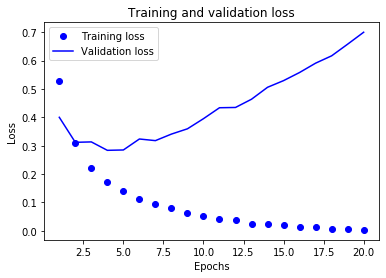

In [22]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

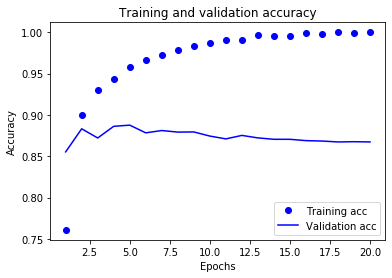

In [23]:
# 훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4714 - accuracy: 0.8020
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2640 - accuracy: 0.9087
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2013 - accuracy: 0.9306
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3411 - accuracy: 0.8674


In [25]:
# 최종 결과
results

[0.3411113917827606, 0.86735999584198]

In [26]:
# 훈련된 모델로 새로운 데이터에 대해 예측
model.predict(x_test)

array([[0.10438329],
       [0.9976199 ],
       [0.3137897 ],
       ...,
       [0.06001615],
       [0.02282405],
       [0.3515138 ]], dtype=float32)